In [1]:
import networkx as nx
import pandas as pd 
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_excel("glycolysis.xlsx")
df.head(5)

,reactant,enzyme,product,flux
0,glucose,hexokinase,glucose-6-phosphate,0.4
1,glucose-6-phosphate,phosphoglucose isomerase,fructose-6-phosphate,6.0
2,fructose-6-phosphate,phosphofructo-kinase,"fructose-1,6-bisphosphate",1.2
3,"fructose-1,6-bisphosphate",fructose bisphosphate adolase,glyceraldehyde-3-phosphate,50.0


In [3]:
G = nx.Graph()

{('glucose', 'glucose-6-phosphate'): 0.4, ('glucose-6-phosphate', 'fructose-6-phosphate'): 6.0}


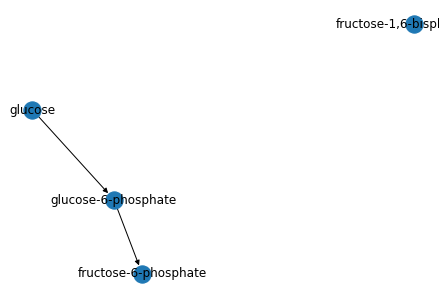

In [25]:
# have to add the enzymes as attributes and not weights 
# THE WEIGHTS CAN BE THE FLUXES SO WE WILL KNOW THE RELATIONSHIP BETWEEN THE NODES!!!
# add directed edges in shell composition 
# use for loops for the edges 

G = nx.DiGraph()

node_list = df["reactant"]
weight_list = df["flux"]

# do for loop for the edge_list
# edge_list = [("glucose", "glucose-6-phosphate", weight_list[0]), ("glucose-6-phosphate", "fructose-6-phosphate", weight_list[1]), ("fructose-6-phosphate", "fructose-1,6-bisphosphate", weight_list[2])]

G.add_nodes_from(node_list)
# G.add_weighted_edges_from(edge_list)




# G.add_edge("glucose", "glucose-6-phosphate", weight = weight_list[0])
a = 0
for reactant in node_list:
    reactant = node_list[a]
    G.add_edge(node_list[a], node_list[a+1], weight = weight_list[a])
    a =+ 1
    


position = nx.spring_layout(G)
nx.draw(G, position, with_labels = True)              
               
print(nx.get_edge_attributes(G, "weight"))



# enzyme_list = df["enzyme"]
# flux_list = df["flux"]
# attribute_1 = "enzyme_list"
# attribute_2 = "flux_list"

# position = nx.spring_layout(G)
# nx.draw(G, position, with_labels = True)
# lables = nx.get_edge_attributes(G, "attribute_1")
# lables2 = nx.get_edge_attributes(G, "attribute_2")

# new-lables = {}
# for key in labels.keys():
#     new_lables[key] = "{} ({})".format(lables[keys], labels2[keys])
# new_labels

# nx.draw_networkx_edge_labels(G, position, edge_labels = new_labels)



{(1, 3): Text(0.0, 0.0, 'best friends')}

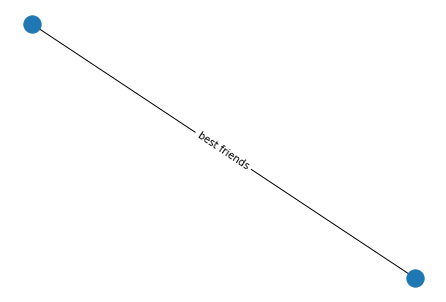

In [16]:
G2.add_edge(1,3, relationship = "best friends")
position = nx.spring_layout(G2)
nx.draw(G2, position, with_lables = True)
labels = nx.get_edge_attributes(G2, "relationship")

nx.draw_networkx_edge_labels(G2, position, edge_labels = labels, node_labels = node_list)